# Path pattern generating preprocess and initializations

## Libraries

In [2]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import math

## Constants

In [3]:
def rotation_matrix(theta): 
    return np.array([[np.cos(theta), np.sin(theta)],
                    [-np.sin(theta), np.cos(theta)]])

In [4]:
IMG_WIDTH = 300
IMG_HEIGHT = 300
NO_DIGITS = 10
PLOT_WIDTH = 15
PLOT_HEIGHT = 6
LOW_RESOLUTION_IMG_SIZE = 10
LOW_RESOLUTION_IMG_MARGIN = 1
PAPER_SIZE = 0.8 # in meters
# PAPER_CENTER = np.array([[-0.95],
#                          [-1.1]])
GLOBAL_PAPER_CENTER = np.array([[-5.8],
                                [-1.1]])
GLOBAL_ROBOT_CENTER = np.array([[-4.84],
                                [0.0]])
GLOBAL_P2R_VEC = GLOBAL_PAPER_CENTER - GLOBAL_ROBOT_CENTER
GLOBAL_PAPER_CX = GLOBAL_PAPER_CENTER[0]
GLOBAL_PAPER_CY = GLOBAL_PAPER_CENTER[1]

R2G_ANGLE = -math.pi/2 # robot to global angle
# PAPER_ROBOT_ANGLE = -math.pi
HEAD_ROTATION = rotation_matrix(R2G_ANGLE)
ROBOT_PAPER_CENTER = np.dot(HEAD_ROTATION, GLOBAL_P2R_VEC) # the coordinates in the robot frame
ROBOT_PAPER_CX = ROBOT_PAPER_CENTER[0]
ROBOT_PAPER_CY = ROBOT_PAPER_CENTER[1]

## Loading the set of premade images

In [5]:
def plot_digits(digit_img):
    plt.figure(figsize=(PLOT_WIDTH, PLOT_HEIGHT))
    for i in range(NO_DIGITS):
        rs = NO_DIGITS/2
        col_no = int(rs)
        row_no = 2 + math.ceil(rs) - col_no # if there are remainings.
        plt.subplot(row_no, col_no, i+1)
        plt.imshow(digit_img[i],cmap='gray')
        plt.axis("off")

In [6]:
IMAGE_PATH = '..\\data\\generated image numbers\\number'
print('initialized data is stored in the following directory:')
print('..\\data\\generated image numbers')

initialized data is stored in the following directory:
..\data\generated image numbers


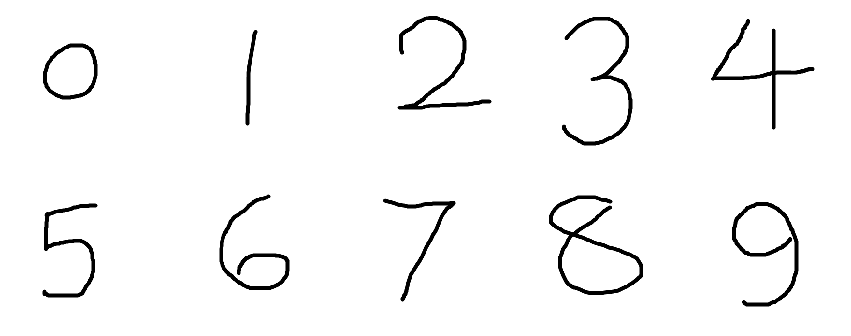

In [7]:
number_gray = np.zeros((NO_DIGITS, IMG_WIDTH ,IMG_HEIGHT))
for i in range (NO_DIGITS):
    number_image = cv.imread(IMAGE_PATH+' '+str(i)+'.png')
    number_gray[i] = cv.cvtColor(number_image, cv.COLOR_BGR2GRAY)

if __name__=='__main__':
    plot_digits(number_gray)

## Morphology Image Processing

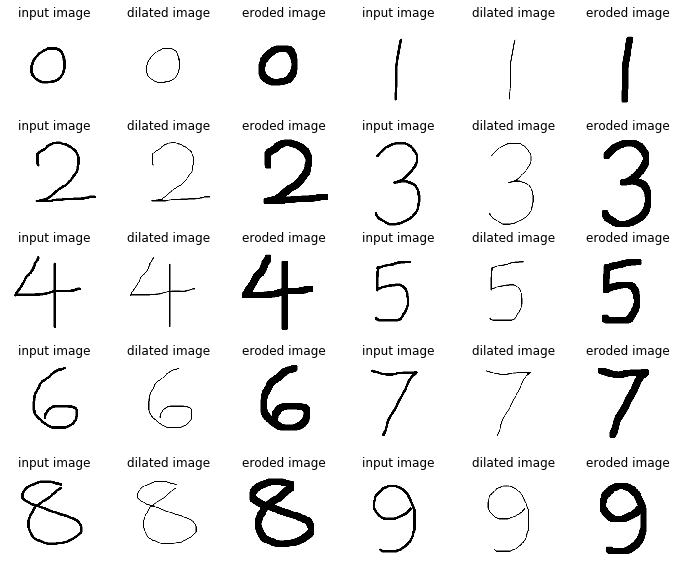

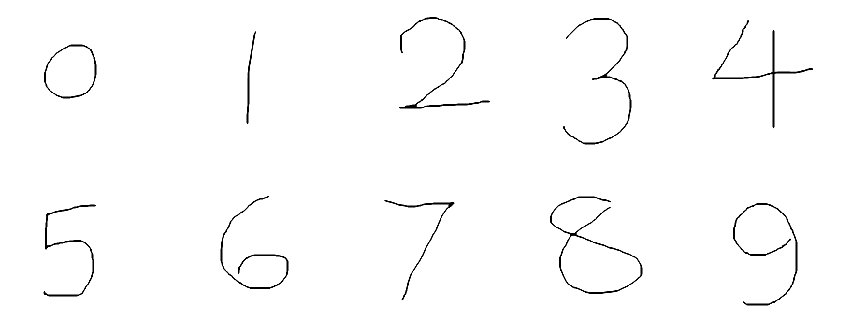

In [12]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
img_dilation = np.zeros((NO_DIGITS, IMG_WIDTH, IMG_HEIGHT))
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
if __name__=='__main__':
    plt.figure(figsize=(12, 10))
for i in range(NO_DIGITS):
    img_erosion = cv.erode(number_gray[i], kernel, iterations=3)
    img_dilation[i, :, :] = cv.dilate(number_gray[i], kernel, iterations=1)
    if __name__=='__main__':
        plt.subplot(5,6, 3*i+1)
        plt.imshow(number_gray[i], cmap='gray')
        plt.title("input image")
        plt.axis("off")
        plt.subplot(5,6, 3*i+2)
        plt.imshow(img_dilation[i], cmap='gray')
        plt.title("dilated image")
        plt.axis("off")
        plt.subplot(5,6, 3*i+3)
        plt.imshow(img_erosion, cmap='gray')
        plt.title("eroded image")
        plt.axis("off")
        

plot_digits(img_dilation)

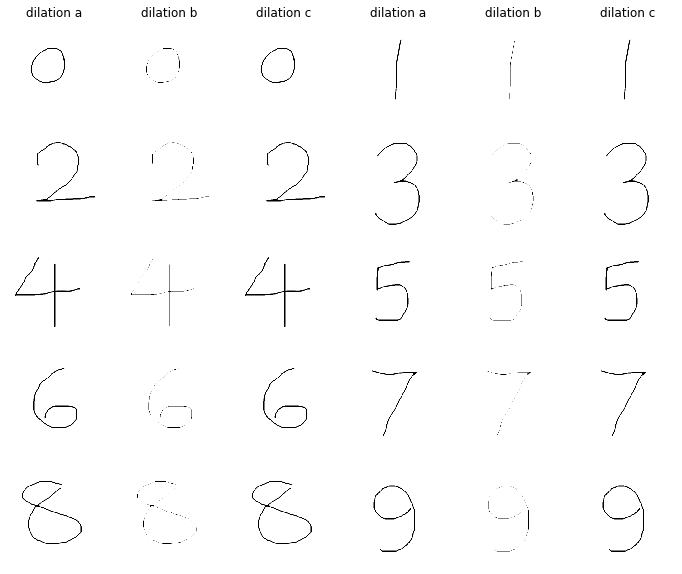

In [13]:
# Taking a matrix of size 5 as the kernel
kernel1 = np.ones((5,5), np.uint8)
kernel2 = np.ones((7,7), np.uint8)
kernel3 = np.ones((3,3), np.uint8)
img_dilation1 = np.zeros((NO_DIGITS, IMG_WIDTH, IMG_HEIGHT))
img_dilation2 = np.zeros((NO_DIGITS, IMG_WIDTH, IMG_HEIGHT))
img_dilation3 = np.zeros((NO_DIGITS, IMG_WIDTH, IMG_HEIGHT))
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
if __name__=='__main__':
    plt.figure(figsize=(12, 10))
    
for i in range(NO_DIGITS):
    img_dilation1[i, :, :] = cv.dilate(number_gray[i], kernel1, iterations=1)
    img_dilation2[i, :, :] = cv.dilate(number_gray[i], kernel2, iterations=1)
    img_dilation3[i, :, :] = cv.dilate(number_gray[i], kernel3, iterations=2)
    if __name__=='__main__':
        plt.subplot(5,6, 3*i+1)
        plt.imshow(img_dilation1[i], cmap='gray')
        if(i<=1):
            plt.title("dilation a")
        plt.axis("off")
        plt.subplot(5,6, 3*i+2)
        plt.imshow(img_dilation2[i], cmap='gray')
        if(i<=1):
            plt.title("dilation b")
        plt.axis("off")
        plt.subplot(5,6, 3*i+3)
        plt.imshow(img_dilation3[i], cmap='gray')
        if(i<=1):
            plt.title("dilation c")
        plt.axis("off")

## Output

In [10]:
for i in range(NO_DIGITS):
    cv.imwrite(IMAGE_PATH+' '+str(i)+' dilated.png', img_dilation[i])
    
IMAGE_PATH

'..\\data\\generated image numbers\\number'